## Inception Module

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate, Dense, Activation, Input
from tensorflow.keras.models import Model

In [ ]:
def inception_module(x,
                     filters_1_1 = 10,
                     filters_1_3 = 10,
                     filters_3_3 = 10,
                     filters_1_5 = 10,
                     filters_5_5 = 10,
                     filters_1_m = 10):
  conv_1_1 = Conv2D(filters_1_1, 1, padding = 'same', activation = 'relu')(x)

  conv_1_3 = Conv2D(filters_1_3, 1, padding = 'same', activation = 'relu')(x)
  conv_3_3 = Conv2D(filters_3_3, 3, padding = 'same', activation = 'relu')(conv_1_3)

  conv_1_5 = Conv2D(filters_1_5, 1, padding = 'same', activation = 'relu')(x)
  conv_5_5 = Conv2D(filters_5_5, 5, padding = 'same', activation = 'relu')(conv_1_5)

  Maxpool = MaxPooling2D(3, strides= 1, padding='same')(x)
  conv_1_m = Conv2D(filters_1_m, 1, padding = 'same', activation = 'relu')(Maxpool)

  output = concatenate([conv_1_1, conv_3_3, conv_5_5, conv_1_m], axis = 3)

  return output

In [ ]:
x = inception_module(x,
                     filters_1_1 = 64,
                     filters_1_3 = 96,
                     filters_3_3 = 128,
                     filters_1_5 = 16,
                     filters_5_5 = 32,
                     filters_1_m = 32)

## Output Visualization function

In [ ]:
def sort_dictionary(dictionary):
  dict_keys = list(dictionary.keys())
  dict_keys.sort()
  return {i: dictionary[i] for i in dict_keys}

def plot_class_output(actual, predicted):
  dict1 = {}
  dict2 = {}
  output_class = []
  output_class2 = []

  for i in predicted:
    output_class.append(tf.argmax(i))
  output_class = np.array(output_class)

  for i in predicted:
    output_class.append(tf.argmax(i))
  output_class = np.array(output_class)

  for i in actual:
    if(i in dict1.keys()):
      dict1[i] = dict1[i]+1
    else:
      dict1[i] = 1

  for i in output_class:
    if(i in dict2.keys()):
      dict2[i] = dict2[i]+1
    else:
      dict2[i] = 1

  values1 = list(sort_dictionary(dict1).values())
  values2 = list(sort_dictionary(dict2).values())

  X = ['class 0','class 1','class 2','class 3']
  Ygirls = values1
  Zboys = values2

  X_axis = np.arange(len(X))

  plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Predicted')
  plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'True')

  plt.xticks(X_axis, X)
  plt.xlabel("class predicted")
  plt.ylabel("No of outputs belonging to eachClass")
  plt.title("DR prediction")
  plt.legend()
  plt.show()

In [ ]:
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  #plot accuracy
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
! gdown --id 1ZkAd2URfLRUrXEQ2mres4me8Rw5hsuOm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZkAd2URfLRUrXEQ2mres4me8Rw5hsuOm
To: /content/messidor.zip
100% 550M/550M [00:09<00:00, 55.4MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/messidor.zip"

with ZipFile(file_name,'r') as openZip:
  openZip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_directory(directory = '/content/messidor/train_data',
                                                  batch_size = 32,
                                                  target_size = (512, 512),
                                                  class_mode = 'categorical',
                                                  seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = '/content/messidor/validation_data',
                                                 batch_size = 32,
                                                 target_size = (512, 512),
                                                 class_mode = 'categorical',
                                                 seed = 42)

test_data = test_datagen.flow_from_directory(directory = '/content/messidor/test_data',
                                                classes=['0','1', '2', '3'],
                                                 batch_size = 32,
                                                 target_size = (512, 512),
                                                 class_mode = 'categorical',
                                                 seed = 42)

Found 1613 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

## Tiny Alexnet

In [ ]:
model1 = Sequential([
    Conv2D(10, 3, input_shape = (512, 512, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(4, activation = 'softmax')
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 10)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 10)       0

In [ ]:
model1.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history1 = model1.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data),
            epochs = 30)

Epoch 1/30
51/51 [==============================] - 72s 1s/step - loss: 19.1910 - accuracy: 0.2982 - val_loss: 1.3548 - val_accuracy: 0.2438
Epoch 2/30
51/51 [==============================] - 60s 1s/step - loss: 1.3548 - accuracy: 0.3298 - val_loss: 1.3123 - val_accuracy: 0.4500
Epoch 3/30
51/51 [==============================] - 60s 1s/step - loss: 1.3368 - accuracy: 0.3763 - val_loss: 1.2284 - val_accuracy: 0.5000
Epoch 4/30
51/51 [==============================] - 60s 1s/step - loss: 1.3020 - accuracy: 0.4135 - val_loss: 1.2515 - val_accuracy: 0.5188
Epoch 5/30
51/51 [==============================] - 61s 1s/step - loss: 1.2493 - accuracy: 0.4414 - val_loss: 1.2252 - val_accuracy: 0.5250
Epoch 6/30
51/51 [==============================] - 60s 1s/step - loss: 1.2022 - accuracy: 0.4650 - val_loss: 1.3095 - val_accuracy: 0.4938
Epoch 7/30
51/51 [==============================] - 60s 1s/step - loss: 1.1232 - accuracy: 0.5046 - val_loss: 1.3538 - val_accuracy: 0.4437
Epoch 8/30
51/51 [=

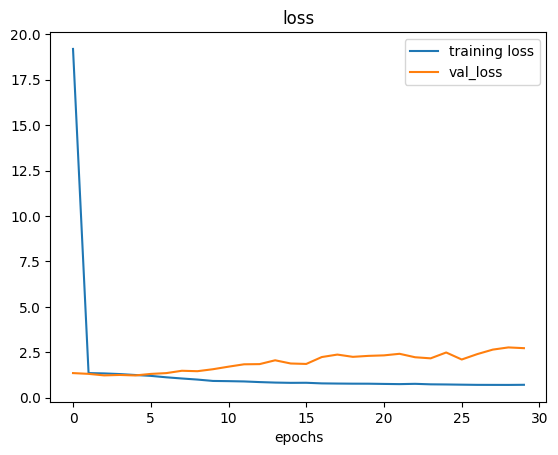

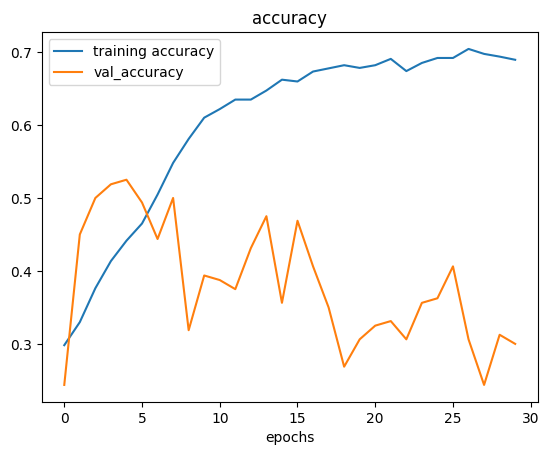

In [ ]:
plot_loss_curves(history1)

In [ ]:
plot_class_output

## AlexNet

In [ ]:
model2 = Sequential([
    Conv2D(10, 3, input_shape = (512, 512, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(100, activation = 'relu'),
    Dropout(.2),
    Dense(4, activation = 'softmax')
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 510, 510, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 255, 255, 10)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 253, 253, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 10)      

In [ ]:
model2.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history2 = model2.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data),
            epochs = 30)

Epoch 1/30
51/51 [==============================] - 63s 1s/step - loss: 2.2677 - accuracy: 0.3366 - val_loss: 1.2448 - val_accuracy: 0.4938
Epoch 2/30
51/51 [==============================] - 60s 1s/step - loss: 1.2757 - accuracy: 0.4241 - val_loss: 1.1811 - val_accuracy: 0.4688
Epoch 3/30
51/51 [==============================] - 60s 1s/step - loss: 1.2330 - accuracy: 0.4265 - val_loss: 1.1528 - val_accuracy: 0.4750
Epoch 4/30
51/51 [==============================] - 60s 1s/step - loss: 1.2201 - accuracy: 0.4358 - val_loss: 1.1523 - val_accuracy: 0.4625
Epoch 5/30
51/51 [==============================] - 60s 1s/step - loss: 1.1834 - accuracy: 0.4668 - val_loss: 1.1727 - val_accuracy: 0.4875
Epoch 6/30
51/51 [==============================] - 60s 1s/step - loss: 1.1752 - accuracy: 0.4650 - val_loss: 1.2316 - val_accuracy: 0.4500
Epoch 7/30
51/51 [==============================] - 60s 1s/step - loss: 1.1224 - accuracy: 0.4972 - val_loss: 1.2172 - val_accuracy: 0.3875
Epoch 8/30
51/51 [==

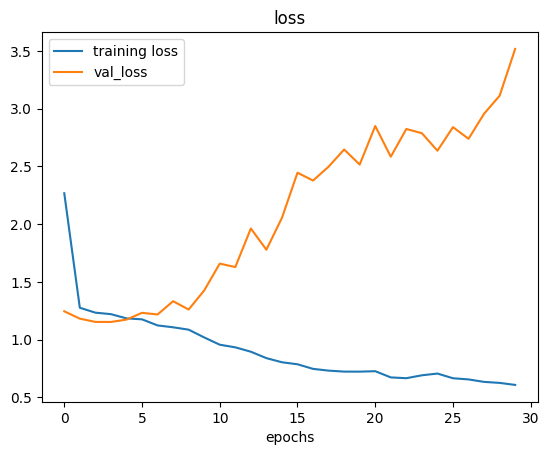

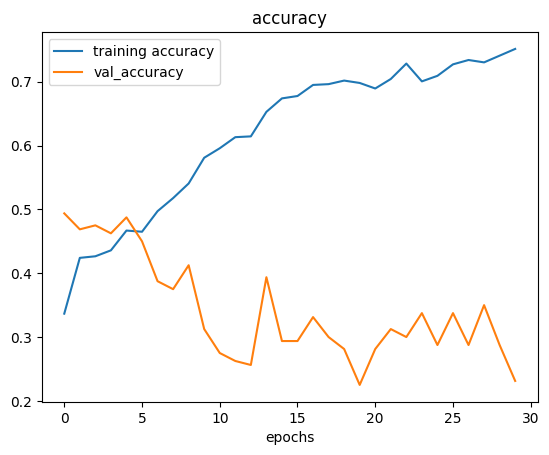

In [ ]:
plot_loss_curves(history2)

## LeNet - 5

In [ ]:
from tensorflow.keras.layers import AveragePooling2D

In [ ]:
model3 = Sequential([
    Conv2D(10, 5, input_shape = (512, 512, 3), activation = 'tanh'),
    AveragePooling2D(),
    Conv2D(10, 5, activation = 'tanh'),
    AveragePooling2D(),
    Flatten(),
    Dense(20, activation = 'tanh'),
    Dense(10, activation = 'tanh'),
    Dense(4, activation = 'softmax')
])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 508, 508, 10)      760       
                                                                 
 average_pooling2d (AverageP  (None, 254, 254, 10)     0         
 ooling2D)                                                       
                                                                 
 conv2d_9 (Conv2D)           (None, 250, 250, 10)      2510      
                                                                 
 average_pooling2d_1 (Averag  (None, 125, 125, 10)     0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 156250)            0         
                                                                 
 dense_6 (Dense)             (None, 20)               

In [ ]:
model3.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history3 = model3.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data),
            epochs = 30)

Epoch 1/30
51/51 [==============================] - 63s 1s/step - loss: 1.4917 - accuracy: 0.2319 - val_loss: 1.4070 - val_accuracy: 0.2500
Epoch 2/30
51/51 [==============================] - 60s 1s/step - loss: 1.3920 - accuracy: 0.2492 - val_loss: 1.3870 - val_accuracy: 0.2500
Epoch 3/30
51/51 [==============================] - 59s 1s/step - loss: 1.3884 - accuracy: 0.2653 - val_loss: 1.3876 - val_accuracy: 0.2500
Epoch 4/30
51/51 [==============================] - 60s 1s/step - loss: 1.3881 - accuracy: 0.2418 - val_loss: 1.3936 - val_accuracy: 0.2500
Epoch 5/30
51/51 [==============================] - 60s 1s/step - loss: 1.3865 - accuracy: 0.2567 - val_loss: 1.3868 - val_accuracy: 0.2500
Epoch 6/30
51/51 [==============================] - 60s 1s/step - loss: 1.3868 - accuracy: 0.2567 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 7/30
51/51 [==============================] - 60s 1s/step - loss: 1.3874 - accuracy: 0.2418 - val_loss: 1.3889 - val_accuracy: 0.2500
Epoch 8/30
51/51 [==

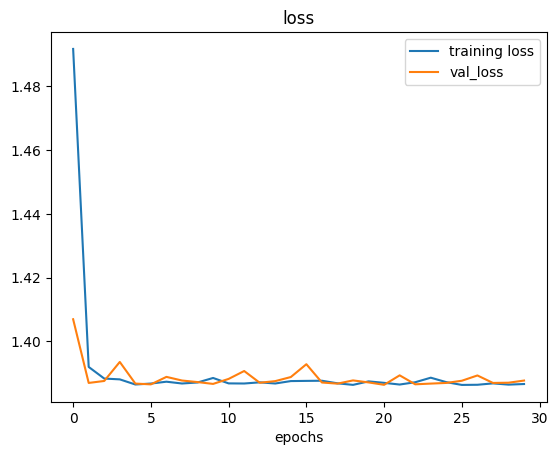

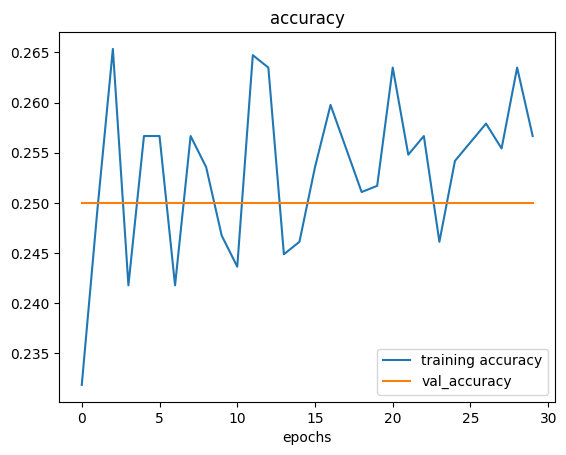

In [ ]:
plot_loss_curves(history3)

## Tiny VGG16

In [ ]:
model4 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

In [ ]:
model4.summary()

In [ ]:
model4.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history4 = model4.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data),
            epochs = 30)

In [ ]:
plot_loss_curves(history4)

## VGG16

In [ ]:
model5 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(4, activation = 'softmax')
])

In [ ]:
model5.summary()

In [ ]:
model5.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history5 = model5.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data),
            epochs = 30)

In [ ]:
plot_loss_curves(history5)

## ResNet

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Activation, concatenate

In [ ]:
def Resnet_block(x,
                 filters_3_1,
                 filters_3_2):

  conv1 = Conv2D(filters_3_1, 3, padding = 'same')(x)
  BN = BatchNormalization()(conv1)
  relu = Activation('relu')(BN)

  conv2 = Conv2D(filters_3_2, 3, padding = 'same')(relu)
  BN2 = BatchNormalization()(conv2)

  output = concatenate([x, BN2], axis = 3)

  return output

## Tiny ResNet

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [ ]:
input_shape = (512,512,3)

inputs = Input(shape = input_shape)

conv1 = Conv2D(64, 7, padding = 'same')(inputs)
BN = BatchNormalization()(conv1)
relu1 = Activation('relu')(BN)
maxpool1 = MaxPooling2D(2)(relu1)

output2 = Resnet_block(maxpool1, 64, 64)
relu2 = Activation('relu')(output2)

maxpool2 = MaxPooling2D(2)(relu2)

output3 = Resnet_block(maxpool2, 128, 128)
relu3 = Activation('relu')(output2)

maxpool3 = MaxPooling2D(2)(relu2)

output4 = Resnet_block(maxpool3, 256, 256)
relu4 = Activation('relu')(output4)

maxpool4 = MaxPooling2D(2)(relu4)

dense = Dense(4)(maxpool4)

model6 = Model(inputs = inputs, outputs = dense)

In [ ]:
model6.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history6 = model1.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data),
            epochs = 30)

Epoch 1/30
51/51 [==============================] - 61s 1s/step - loss: 0.7067 - accuracy: 0.6962 - val_loss: 2.6498 - val_accuracy: 0.3187
Epoch 2/30
51/51 [==============================] - 60s 1s/step - loss: 0.6730 - accuracy: 0.7049 - val_loss: 2.8852 - val_accuracy: 0.3438
Epoch 3/30
51/51 [==============================] - 60s 1s/step - loss: 0.6779 - accuracy: 0.7074 - val_loss: 3.0657 - val_accuracy: 0.3875
Epoch 4/30
51/51 [==============================] - 60s 1s/step - loss: 0.6635 - accuracy: 0.7092 - val_loss: 3.2412 - val_accuracy: 0.3063
Epoch 5/30
51/51 [==============================] - 60s 1s/step - loss: 0.6623 - accuracy: 0.7068 - val_loss: 3.1801 - val_accuracy: 0.3438
Epoch 6/30
51/51 [==============================] - 60s 1s/step - loss: 0.6534 - accuracy: 0.7111 - val_loss: 3.4446 - val_accuracy: 0.3125
Epoch 7/30
51/51 [==============================] - 60s 1s/step - loss: 0.6609 - accuracy: 0.7055 - val_loss: 3.0700 - val_accuracy: 0.3438
Epoch 8/30
51/51 [==

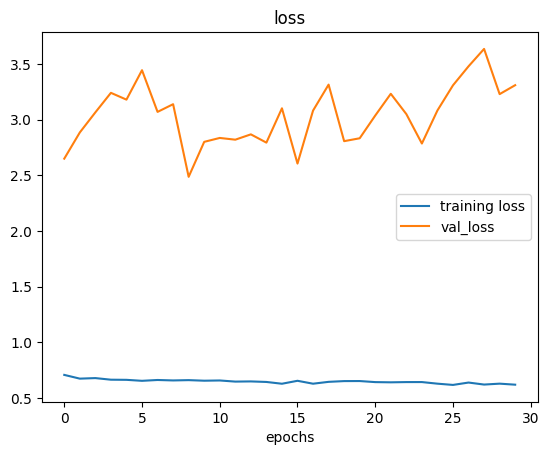

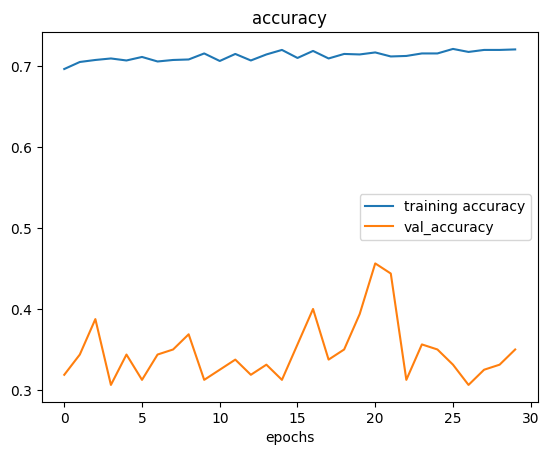

In [ ]:
plot_loss_curves(history6)

In [ ]:
from keras.utils.vis_utils import plot_model

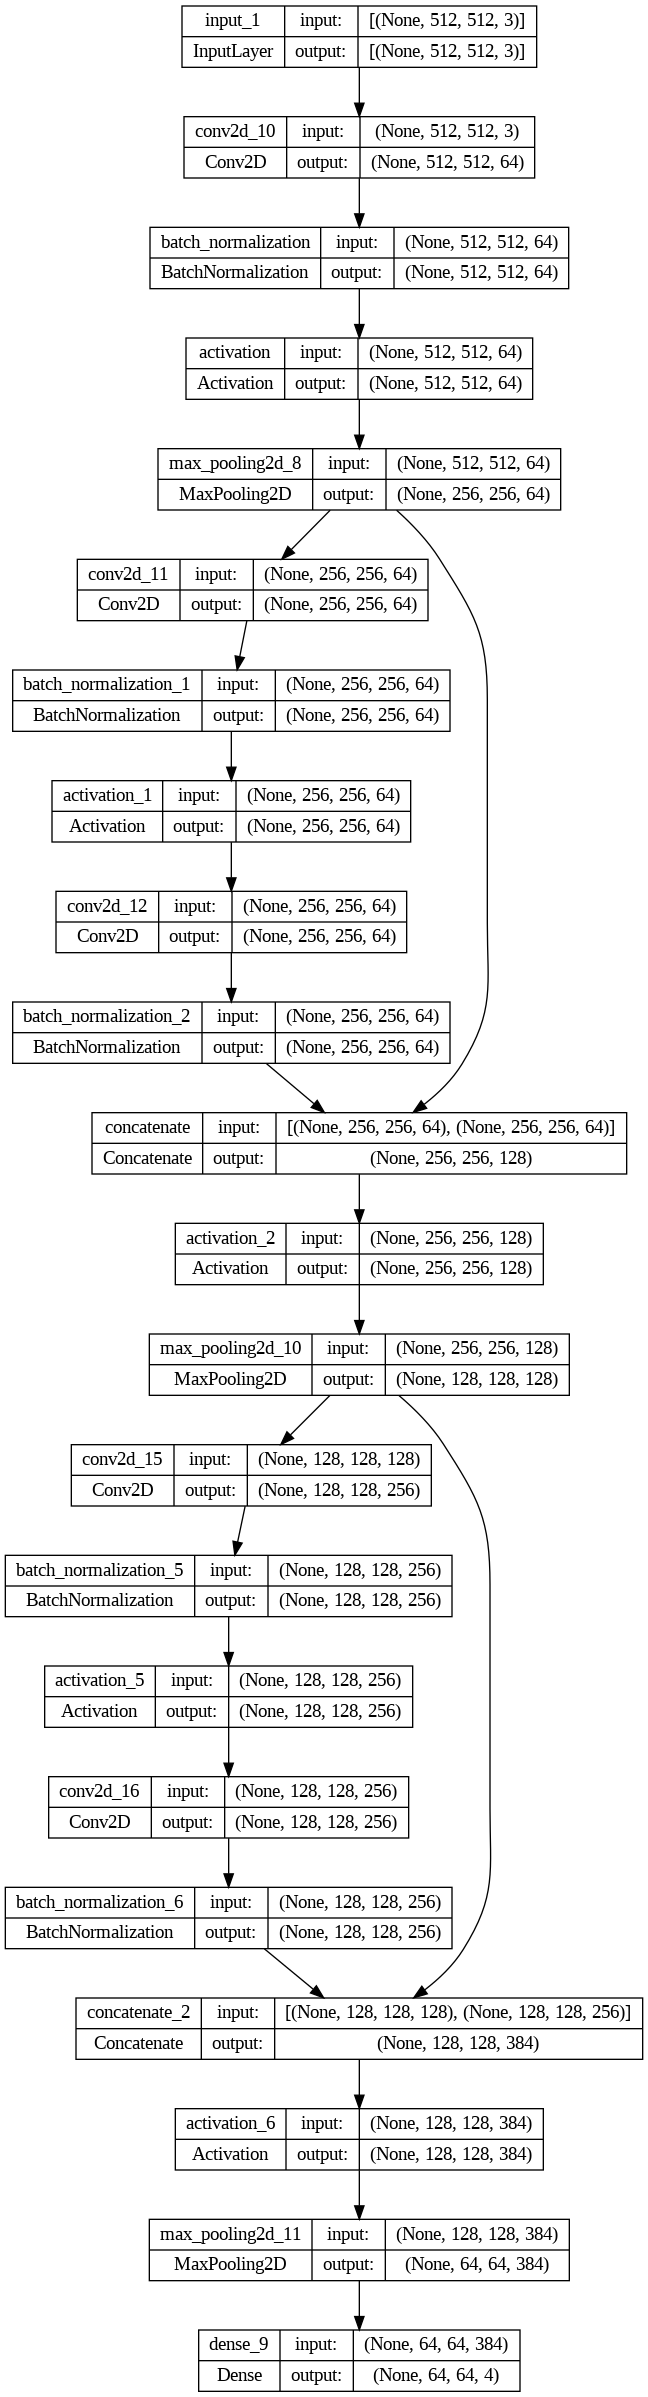

In [ ]:
plot_model(model6, show_shapes=True, show_layer_names=True)

In [ ]:
model6.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 512, 512, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d_10[0][0]']              
 alization)                     )                                                             

## Tiny Inception

In [ ]:
input_shape = (512, 512, 3)

inputs = Input(shape = input_shape)

x = Conv2D(64, 7, padding = 'same', strides = (2,2), activation = 'relu')(inputs)
x = MaxPooling2D(3, padding = 'same', strides = (2,2))(x)
x = Conv2D(64, 1, padding = 'same', activation = 'relu')(x)
x = Conv2D(64, 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(3, padding = 'same', strides = 2)(x)

x = inception_module(x,
                     filters_1_1=64,
                     filters_1_3 = 96,
                     filters_3_3=128,
                     filters_1_5=16,
                     filters_5_5=32,
                     filters_1_m=32)

x = MaxPooling2D(3, padding = 'same', strides = 2)(x)

x = inception_module(x,
                     filters_1_1=192,
                     filters_1_3 = 96,
                     filters_3_3=208,
                     filters_1_5=16,
                     filters_5_5=48,
                     filters_1_m=64)
x = AveragePooling2D(5, strides = 3)(x)
x = Conv2D(128, 1, padding = 'same', activation = 'relu')(x)
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)
x = Dropout(0.7)(x)
x = Dense(4, activation = 'softmax')(x)

model7 = Model(inputs = inputs, outputs = x)

In [ ]:
model7.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history7 = model1.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data),
            epochs = 30)

Epoch 1/30
51/51 [==============================] - 61s 1s/step - loss: 0.6363 - accuracy: 0.7136 - val_loss: 3.4474 - val_accuracy: 0.3688
Epoch 2/30
51/51 [==============================] - 60s 1s/step - loss: 0.6312 - accuracy: 0.7167 - val_loss: 3.9899 - val_accuracy: 0.3625
Epoch 3/30
51/51 [==============================] - 60s 1s/step - loss: 0.6530 - accuracy: 0.7123 - val_loss: 3.5173 - val_accuracy: 0.3438
Epoch 4/30
51/51 [==============================] - 60s 1s/step - loss: 0.6371 - accuracy: 0.7161 - val_loss: 3.0490 - val_accuracy: 0.3562
Epoch 5/30
51/51 [==============================] - 60s 1s/step - loss: 0.6192 - accuracy: 0.7235 - val_loss: 4.0480 - val_accuracy: 0.3438
Epoch 6/30
51/51 [==============================] - 60s 1s/step - loss: 0.6220 - accuracy: 0.7241 - val_loss: 3.2428 - val_accuracy: 0.3562
Epoch 7/30
51/51 [==============================] - 60s 1s/step - loss: 0.6236 - accuracy: 0.7216 - val_loss: 2.9847 - val_accuracy: 0.4062
Epoch 8/30
51/51 [==

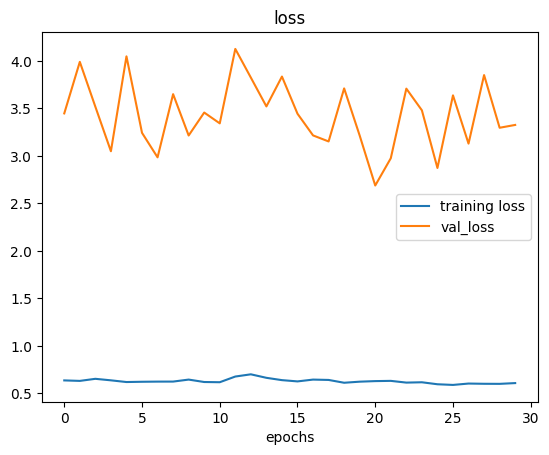

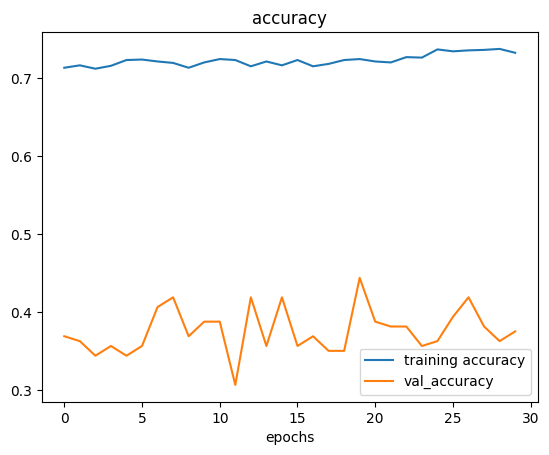

In [ ]:
plot_loss_curves(history7)

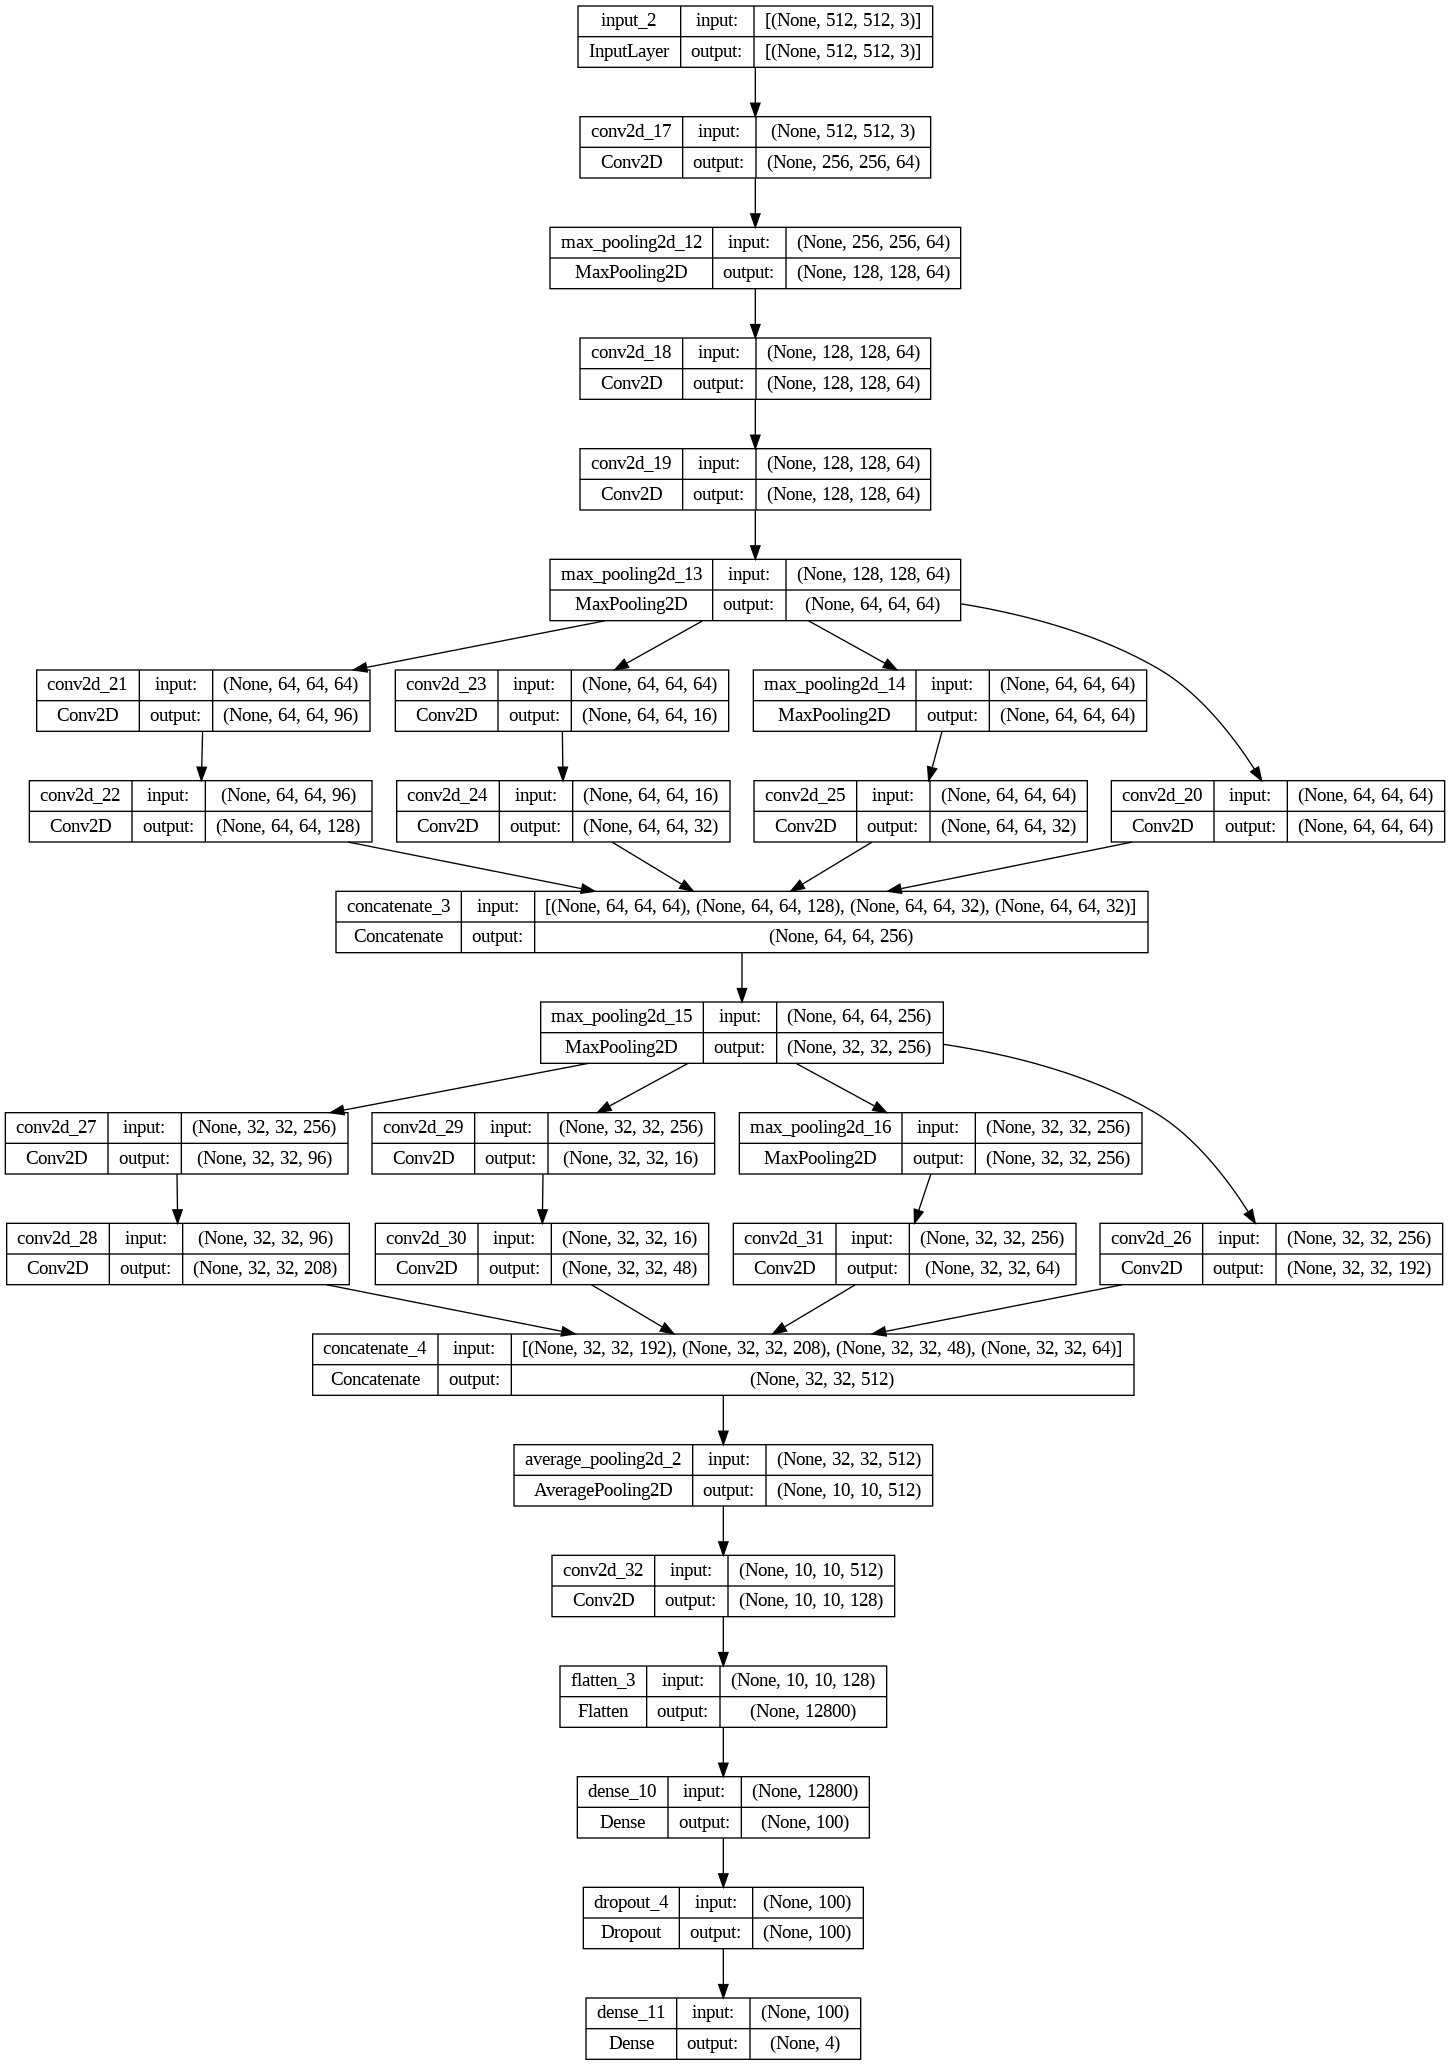

In [ ]:
plot_model(model7, show_shapes=True, show_layer_names=True)

In [ ]:
model7.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 256, 256, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 128, 128, 64  0          ['conv2d_17[0][0]']              
 )                              )                                                           

In [ ]:
import tensorflow as tf

In [ ]:
constant1 = tf.constant([[1,2],[3,4]], dtype = tf.float32)
constant1/255.

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.00392157, 0.00784314],
       [0.01176471, 0.01568628]], dtype=float32)>

In [ ]:
model = tf.keras.models.load_model("/content/model4_d2.h5")

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 510, 510, 10)      280       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 255, 255, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 253, 253, 10)      910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 126, 126, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 62, 62, 10)      

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
image = plt.imread("/content/20051130_54257_0400_PP.tif")

In [ ]:
image_resize = tf.keras.preprocessing.image.smart_resize(
    image, (512, 512), interpolation='bilinear'
)

In [ ]:
image_resize.shape

(512, 512, 3)

In [ ]:
image_resize = image_resize/.255

In [ ]:
image_resize = tf.expand_dims(image_resize, axis = 0)

In [ ]:
output = model.predict(image_resize)

1/1 [==============================] - 0s 130ms/step


In [ ]:
class_ = tf.argmax(output[0])
class_

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Dropout

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top = False)
base_model.trainable = True

for layer in base_model.layers[:-150]:
  layer.trainable = False

input = Input(shape = (512, 512, 3))
x = base_model(input)
x = GlobalAveragePooling2D()(x)
x = Dense(4, activation = 'softmax')(x)

model3 = tf.keras.Model(inputs = input, outputs = x)

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
model3.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history3 = model3.fit(train_data,
                      epochs = 15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
           )

Epoch 1/15
51/51 [==============================] - 101s 1s/step - loss: 1.3525 - accuracy: 0.3974 - val_loss: 14.1483 - val_accuracy: 0.2500
Epoch 2/15
51/51 [==============================] - 59s 1s/step - loss: 1.2253 - accuracy: 0.4247 - val_loss: 1.1720 - val_accuracy: 0.5000
Epoch 3/15
51/51 [==============================] - 59s 1s/step - loss: 1.2085 - accuracy: 0.4172 - val_loss: 1.2429 - val_accuracy: 0.3562
Epoch 4/15
51/51 [==============================] - 59s 1s/step - loss: 1.2306 - accuracy: 0.4179 - val_loss: 0.9793 - val_accuracy: 0.5188
Epoch 5/15
51/51 [==============================] - 59s 1s/step - loss: 1.1833 - accuracy: 0.4420 - val_loss: 1.3338 - val_accuracy: 0.2937
Epoch 6/15
51/51 [==============================] - 59s 1s/step - loss: 1.1923 - accuracy: 0.4439 - val_loss: 1.4935 - val_accuracy: 0.2500
Epoch 7/15
51/51 [==============================] - 59s 1s/step - loss: 1.1768 - accuracy: 0.4433 - val_loss: 1.6117 - val_accuracy: 0.2812
Epoch 8/15
51/51 [

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top = False)
base_model.trainable = True

for layer in base_model.layers[:-150]:
  layer.trainable = False

input = Input(shape = (512, 512, 3))
x = base_model(input)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(4, activation = 'softmax')(x)

model14 = tf.keras.Model(inputs = input, outputs = x)

In [ ]:
model14.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics = ['accuracy'])
history14 = model14.fit(train_data,
                      epochs = 30,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
           )

Epoch 1/30
51/51 [==============================] - 89s 1s/step - loss: 1.3832 - accuracy: 0.3435 - val_loss: 1.2293 - val_accuracy: 0.4812
Epoch 2/30
51/51 [==============================] - 60s 1s/step - loss: 1.3009 - accuracy: 0.3664 - val_loss: 1.2184 - val_accuracy: 0.5063
Epoch 3/30
51/51 [==============================] - 60s 1s/step - loss: 1.2649 - accuracy: 0.3875 - val_loss: 1.2515 - val_accuracy: 0.4437
Epoch 4/30
51/51 [==============================] - 60s 1s/step - loss: 1.2623 - accuracy: 0.3769 - val_loss: 1.1904 - val_accuracy: 0.5125
Epoch 5/30
51/51 [==============================] - 60s 1s/step - loss: 1.2202 - accuracy: 0.3980 - val_loss: 1.2162 - val_accuracy: 0.4750
Epoch 6/30
51/51 [==============================] - 60s 1s/step - loss: 1.2173 - accuracy: 0.4092 - val_loss: 1.1940 - val_accuracy: 0.4938
Epoch 7/30
51/51 [==============================] - 60s 1s/step - loss: 1.2197 - accuracy: 0.4011 - val_loss: 1.2434 - val_accuracy: 0.3750
Epoch 8/30
51/51 [==

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_aug_layer = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
    #preprocessing.Rescale(1./255)
], name = 'data_aug_layer')

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top = False)
base_model.trainable = True

for layer in base_model.layers[:-150]:
  layer.trainable = False

input = Input(shape = (512, 512, 3))
x = data_aug_layer(input, training = True)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(4, activation = 'softmax')(x)

model15 = tf.keras.Model(inputs = input, outputs = x)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
model_chekpoint = tf.keras.callbacks.ModelCheckpoint("model_checkpoints/DenseNet/checkpoint.ckpt",
                                                     monitor = "val_acc",
                                                     save_best_only=True,
                                                     save_freq='epoch')

In [ ]:
model15.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['accuracy'])
history15 = model15.fit(train_data,
                      epochs = 30,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data),
                      callbacks=[reduce_lr, model_chekpoint]
           )

Epoch 1/30
51/51 [==============================] - ETA: 0s - loss: 1.3870 - accuracy: 0.2511

51/51 [==============================] - 105s 2s/step - loss: 1.3870 - accuracy: 0.2511 - val_loss: 1.3875 - val_accuracy: 0.2500 - lr: 0.0100
Epoch 2/30
51/51 [==============================] - ETA: 0s - loss: 1.3861 - accuracy: 0.2635

51/51 [==============================] - 68s 1s/step - loss: 1.3861 - accuracy: 0.2635 - val_loss: 1.3872 - val_accuracy: 0.2500 - lr: 0.0100
Epoch 3/30
51/51 [==============================] - ETA: 0s - loss: 1.3860 - accuracy: 0.2635

51/51 [==============================] - 69s 1s/step - loss: 1.3860 - accuracy: 0.2635 - val_loss: 1.3883 - val_accuracy: 0.2500 - lr: 0.0100
Epoch 4/30
51/51 [==============================] - ETA: 0s - loss: 1.3859 - accuracy: 0.2635

51/51 [==============================] - 67s 1s/step - loss: 1.3859 - accuracy: 0.2635 - val_loss: 1.3872 - val_accuracy: 0.2500 - lr: 0.0100
Epoch 5/30
51/51 [==============================] - ETA: 0s - loss: 1.3859 - accuracy: 0.2362

51/51 [==============================] - 69s 1s/step - loss: 1.3859 - accuracy: 0.2362 - val_loss: 1.3877 - val_accuracy: 0.2500 - lr: 0.0100
Epoch 6/30
10/51 [====>.........................] - ETA: 42s - loss: 1.3865 - accuracy: 0.2500

KeyboardInterrupt: ignored